In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import cv2

# cv2_imshow()

from PIL import Image
import tensorflow as tf
#for neural network weights
tf.random.set_seed(3)

from tensorflow import keras
#MNIST
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
#loading the mnist data from keras datasets

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# 60000 image of pixel 28X28
# 10000 test images
# gray scale image

print(X_train[10])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

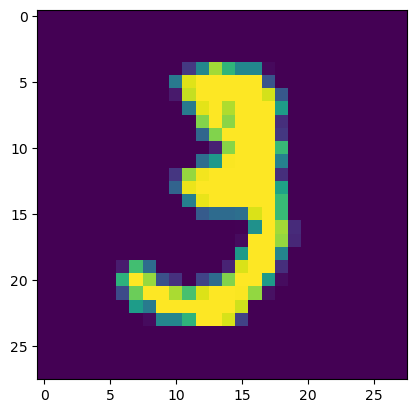

In [6]:
sample_img = plt.imshow(X_train[10])
plt.show()

In [7]:
print(Y_train[10])

3


In [8]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
# all the images have the same dimensions in this dataset.if not, we have to resize all the images to a common dimension
X_train = X_train/255
X_test = X_test/255

In [10]:
# Building neural networks

# setting layers to NN

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #if rgb (28,28, 3)
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [11]:
#compiling the NN

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
#training the NN

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3024 - accuracy: 0.9124
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1413 - accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1059 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0861 - accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0701 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0603 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0519 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0452 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0414 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.033

In [13]:
#testing

loss, accuracy = model.evaluate(X_test, Y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9735


In [14]:
print(Y_test[0])

7


In [15]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [16]:
print(Y_pred.shape)

(10000, 10)


In [17]:
print(Y_pred[0])

[1.5019531e-04 5.4826951e-03 2.6703147e-02 4.4266456e-01 1.6537329e-04
 1.9767540e-04 3.4033079e-09 9.9999571e-01 6.5501505e-03 2.0475034e-02]


In [18]:
label_for_first_image = np.argmax(Y_pred[0])

In [19]:
print(label_for_first_image)

7


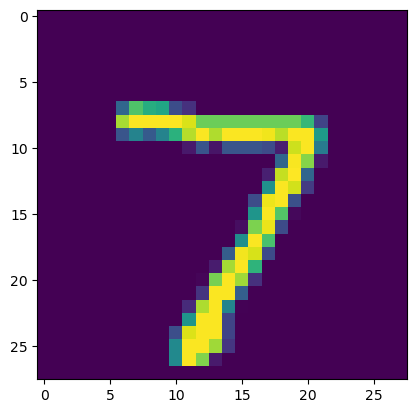

In [20]:
plt.imshow(X_test[0])
plt.show()

In [21]:
Y_pred_label_final = [np.argmax(i) for i in Y_pred]
print(Y_pred_label_final)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 8, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [22]:
#confusion matrix

conf_mat = confusion_matrix(Y_test, Y_pred_label_final)

print(conf_mat)

tf.Tensor(
[[ 968    0    0    2    0    5    1    2    2    0]
 [   0 1123    3    3    0    0    2    0    3    1]
 [   5    2 1004    6    3    0    2    4    5    1]
 [   0    0    5  976    0   12    0    5    6    6]
 [   3    1    4    1  963    1    3    1    0    5]
 [   2    0    0    5    1  878    1    0    2    3]
 [   3    2    4    2    2   16  926    0    3    0]
 [   1    6   11    0    4    0    0  999    3    4]
 [   4    2    3    5    6   14    0    4  929    7]
 [   3    2    0    3   17    3    1    8    3  969]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

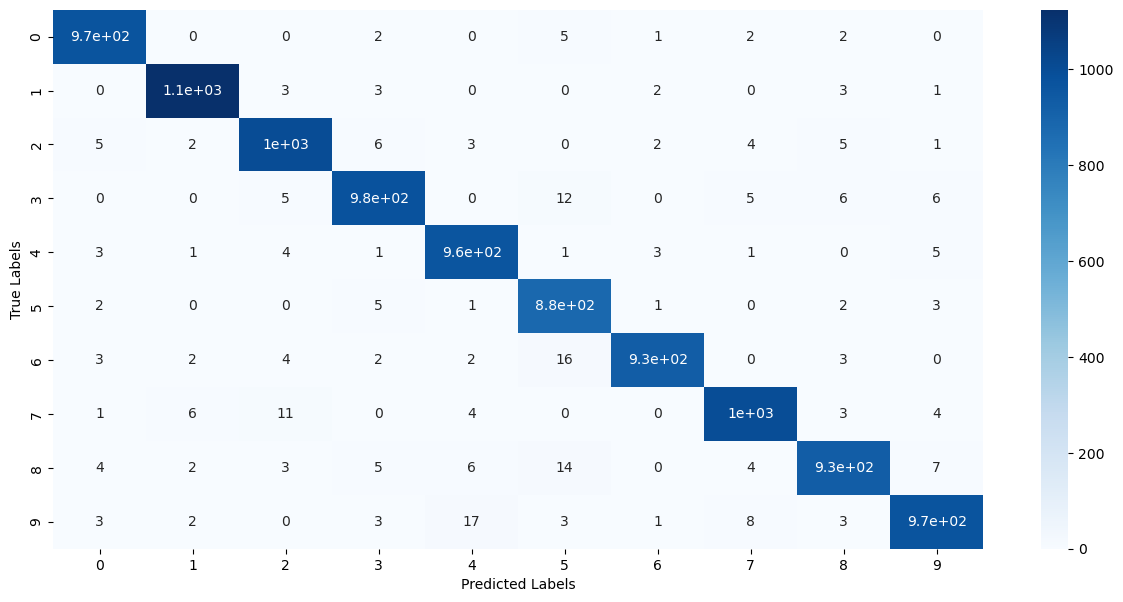

In [23]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [24]:
import matplotlib.image as mpimg   # for import image

img = mpimg.imread("test.jpg")
type(img)
print(img.shape)

(286, 292, 3)


In [25]:
print(img)

[[[251 251 251]
  [246 246 246]
  [243 243 243]
  ...
  [244 244 244]
  [246 246 246]
  [248 248 248]]

 [[250 250 250]
  [246 246 246]
  [242 242 242]
  ...
  [244 244 244]
  [246 246 246]
  [248 248 248]]

 [[248 248 248]
  [245 245 245]
  [241 241 241]
  ...
  [244 244 244]
  [246 246 246]
  [248 248 248]]

 ...

 [[248 248 248]
  [243 243 243]
  [241 241 241]
  ...
  [244 244 244]
  [246 246 246]
  [248 248 248]]

 [[249 249 249]
  [245 245 245]
  [242 242 242]
  ...
  [244 244 244]
  [246 246 246]
  [248 248 248]]

 [[251 251 251]
  [246 246 246]
  [243 243 243]
  ...
  [244 244 244]
  [246 246 246]
  [248 248 248]]]


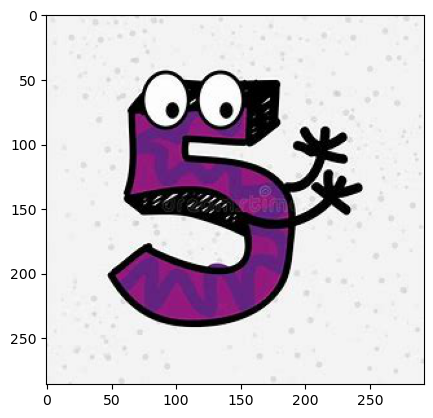

In [26]:
img_plot = plt.imshow(img)
plt.show()

In [27]:
img_actual_img = Image.open('test.jpg')
img_resize = img_actual_img.resize((28, 28))
img_resize.save("resized_img.jpg")

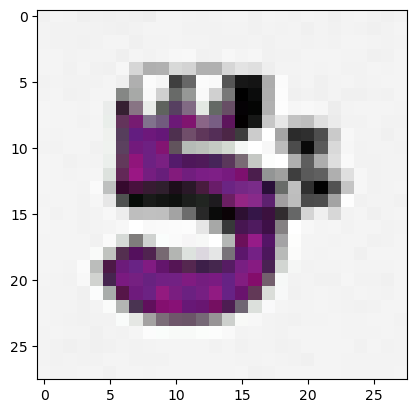

In [28]:
img_plot = plt.imshow(img_resize)
plt.show()

In [29]:
img_resize = mpimg.imread("resized_img.jpg")
print(img_resize)

[[[248 230 252]
  [255 242 255]
  [252 240 254]
  ...
  [242 242 242]
  [241 243 240]
  [240 245 239]]

 [[248 236 250]
  [252 241 255]
  [245 237 248]
  ...
  [242 242 242]
  [241 243 240]
  [242 244 241]]

 [[244 242 247]
  [242 240 245]
  [239 237 240]
  ...
  [242 242 242]
  [242 242 242]
  [242 244 241]]

 ...

 [[236 249 232]
  [235 248 231]
  [236 247 233]
  ...
  [243 243 243]
  [244 242 245]
  [246 241 247]]

 [[247 240 247]
  [247 240 247]
  [246 239 246]
  ...
  [243 243 243]
  [244 242 245]
  [244 242 245]]

 [[255 236 255]
  [254 235 255]
  [253 234 254]
  ...
  [243 243 243]
  [243 243 243]
  [243 243 243]]]


In [30]:
print(img_resize.shape)

(28, 28, 3)


In [31]:
img = cv2.imread("resized_img.jpg")
greyscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(greyscale_img.shape)

(28, 28)


In [32]:
greyscale_img = greyscale_img/255

In [33]:
print(greyscale_img)

[[0.9372549  0.97647059 0.96078431 0.94509804 0.94901961 0.94117647
  0.97254902 0.94117647 0.9372549  0.9372549  1.         0.94901961
  0.95686275 0.92156863 0.94901961 0.96078431 0.9372549  0.94901961
  0.92941176 0.95294118 0.99607843 0.9372549  0.90196078 0.97647059
  0.94901961 0.94901961 0.94901961 0.95294118]
 [0.94509804 0.96470588 0.94509804 0.94117647 0.9372549  0.95686275
  0.88627451 0.94901961 0.99215686 0.9254902  0.89019608 0.94901961
  0.96078431 0.99215686 0.96078431 0.96862745 0.93333333 0.99215686
  0.97254902 0.91764706 0.92156863 0.94117647 0.94901961 0.97254902
  0.94901961 0.94901961 0.94901961 0.95294118]
 [0.95686275 0.94509804 0.9372549  0.94901961 0.9372549  0.99607843
  0.88627451 0.98039216 0.89803922 0.98039216 0.98823529 0.94117647
  0.9254902  0.94509804 0.94509804 0.94117647 0.91764706 0.96470588
  0.98823529 0.97254902 0.97254902 0.98431373 0.95294118 0.90588235
  0.94901961 0.94901961 0.94901961 0.95294118]
 [0.97647059 0.94117647 0.94509804 0.964705

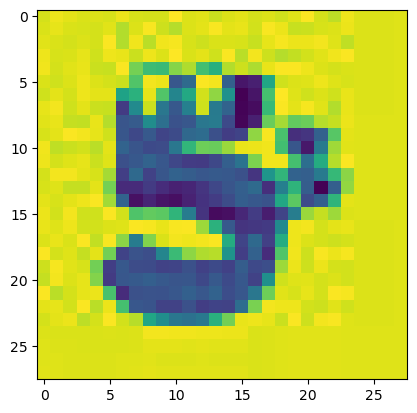

In [34]:
img_plot = plt.imshow(greyscale_img)
plt.show()

In [35]:
greyscale_img.shape

(28, 28)

In [36]:
type(greyscale_img)

numpy.ndarray

In [37]:
image_reshaped = np.reshape(greyscale_img, [1,28,28])   #if rgb [1,28, 28,3]
type(image_reshaped)

numpy.ndarray

In [38]:
Y_final_pred = model.predict(image_reshaped)

1/1 [==============================] - 0s 15ms/step


In [39]:
print(Y_final_pred)

[[9.78080643e-05 1.35325931e-03 9.99934971e-01 9.99997258e-01
  0.00000000e+00 9.99999225e-01 1.02207205e-14 8.89361084e-01
  4.47082783e-07 1.52996897e-22]]


In [40]:
ans_final = np.argmax(Y_final_pred)

In [41]:
print(ans_final)

5
